# NAME: V RAGHAV ANAND

# REGISTER NUMBER: 19BCE1415

## QUESTION NUMBER - 2: The children.csv dataset contains the information of around 2300 children that attended the emergency services with fever and were tested for serious bacterial infection. The outcome of the children infected has 4 categories: Not Applicable(no infection) / UTI / Pneum / Bact

## Build a model using wcc, age, prevAB, pct, and crp to predict the outcome.

## Compute the confusion matrix .and calculate the accuracy, recall, precision and plot the graphs. Write your observations in a separate cell.

## Reduce the depth of the tree and infer the observations

## How does the model classify a child with 1 year of age, WCC=29, PCT=5, CRP=200 and no prevAB?

##  Calculate probability for any given input (Note while calculating the probability you are not supposed to use library function )

# AIM: To build a decision tree model using wcc, age, prevAB, pct, and crp to predict the outcome from the given dataset children.csv and analyze the performance metrics

## Importing the required libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier 
#to draw the graph
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus 

## Reading the dataset

In [2]:
dataset=pd.read_csv("children.csv")

In [3]:
dataset

Unnamed: 0      id  fever_hours   age sex   wcc prevAB            sbi  \
0              1   57906         24.0  0.79   M   3.8     No            UTI   
1              2   58031         48.0  1.91   F  25.3    Yes            UTI   
2              3   58148         24.0  0.07   F  20.0     No            UTI   
3              4   58169         72.0  0.95   M   6.0     No            UTI   
4              5   58517          1.0  0.11   F  15.6     No            UTI   
...          ...     ...          ...   ...  ..   ...    ...            ...   
2343        2344  229318         48.0  1.06   M  14.1     No  NotApplicable   
2344        2345  229506         24.0  3.05   M  14.6     No  NotApplicable   
2345        2346  229794         48.0  1.81   M   6.0     No  NotApplicable   
2346        2347  229962         24.0  1.24   M  16.3    Yes  NotApplicable   
2347        2348  229985         24.0  3.56   F  13.0     No  NotApplicable   

            pct         crp  
0      0.090000   17.700000  
1      4.400000  150.400000  
2      0.548136   47.359279  
3      0.310000    4.900000  
4      0.936872   31.394860  
...         ...         ...  
2343   0.160000   16.700000  
2344   1.080000   77.500000  
2345   0.480000   75.300000  
2346  20.280000   17.300000  
2347   0.606293   18.181134  

[2348 rows x 10 columns]

## General statistical analysis

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348 entries, 0 to 2347
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   2348 non-null   int64  
 1   id           2348 non-null   int64  
 2   fever_hours  2348 non-null   float64
 3   age          2348 non-null   float64
 4   sex          2348 non-null   object 
 5   wcc          2348 non-null   float64
 6   prevAB       2348 non-null   object 
 7   sbi          2348 non-null   object 
 8   pct          2348 non-null   float64
 9   crp          2348 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 183.6+ KB


In [5]:
dataset.describe()

Unnamed: 0             id  fever_hours          age          wcc  \
count  2348.000000    2348.000000  2348.000000  2348.000000  2348.000000   
mean   1174.500000  153698.344549    80.060605     1.835720    12.643110   
std     677.953538   51071.687612   162.713141     1.326684     6.421293   
min       1.000000     495.000000     0.000000     0.010000     0.236790   
25%     587.750000  133039.250000    24.000000     0.760000     7.900000   
50%    1174.500000  160015.500000    48.000000     1.525000    11.600000   
75%    1761.250000  196030.000000    78.000000     2.752500    16.100000   
max    2348.000000  229986.000000  3360.000000     4.990000    58.700000   

               pct          crp  
count  2348.000000  2348.000000  
mean      3.743542    48.414266  
std       7.599784    52.628054  
min       0.008647     0.000000  
25%       0.160000    11.825489  
50%       0.760000    30.972059  
75%       4.619953    66.200000  
max     156.470000   429.900000

## Build a model using wcc, age, prevAB, pct, and crp to predict the outcome.

## Dropping the unnecessary columns not required for the model

In [6]:
df=dataset.drop("id",axis=1)
df

Unnamed: 0  fever_hours   age sex   wcc prevAB            sbi  \
0              1         24.0  0.79   M   3.8     No            UTI   
1              2         48.0  1.91   F  25.3    Yes            UTI   
2              3         24.0  0.07   F  20.0     No            UTI   
3              4         72.0  0.95   M   6.0     No            UTI   
4              5          1.0  0.11   F  15.6     No            UTI   
...          ...          ...   ...  ..   ...    ...            ...   
2343        2344         48.0  1.06   M  14.1     No  NotApplicable   
2344        2345         24.0  3.05   M  14.6     No  NotApplicable   
2345        2346         48.0  1.81   M   6.0     No  NotApplicable   
2346        2347         24.0  1.24   M  16.3    Yes  NotApplicable   
2347        2348         24.0  3.56   F  13.0     No  NotApplicable   

            pct         crp  
0      0.090000   17.700000  
1      4.400000  150.400000  
2      0.548136   47.359279  
3      0.310000    4.900000  
4      0.936872   31.394860  
...         ...         ...  
2343   0.160000   16.700000  
2344   1.080000   77.500000  
2345   0.480000   75.300000  
2346  20.280000   17.300000  
2347   0.606293   18.181134  

[2348 rows x 9 columns]

In [7]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

fever_hours   age sex   wcc prevAB            sbi        pct         crp
0            24.0  0.79   M   3.8     No            UTI   0.090000   17.700000
1            48.0  1.91   F  25.3    Yes            UTI   4.400000  150.400000
2            24.0  0.07   F  20.0     No            UTI   0.548136   47.359279
3            72.0  0.95   M   6.0     No            UTI   0.310000    4.900000
4             1.0  0.11   F  15.6     No            UTI   0.936872   31.394860
...           ...   ...  ..   ...    ...            ...        ...         ...
2343         48.0  1.06   M  14.1     No  NotApplicable   0.160000   16.700000
2344         24.0  3.05   M  14.6     No  NotApplicable   1.080000   77.500000
2345         48.0  1.81   M   6.0     No  NotApplicable   0.480000   75.300000
2346         24.0  1.24   M  16.3    Yes  NotApplicable  20.280000   17.300000
2347         24.0  3.56   F  13.0     No  NotApplicable   0.606293   18.181134

[2348 rows x 8 columns]

In [8]:
df=df.drop("fever_hours",axis=1)

In [9]:
df=df.drop("sex",axis=1)

In [10]:
df

age   wcc prevAB            sbi        pct         crp
0     0.79   3.8     No            UTI   0.090000   17.700000
1     1.91  25.3    Yes            UTI   4.400000  150.400000
2     0.07  20.0     No            UTI   0.548136   47.359279
3     0.95   6.0     No            UTI   0.310000    4.900000
4     0.11  15.6     No            UTI   0.936872   31.394860
...    ...   ...    ...            ...        ...         ...
2343  1.06  14.1     No  NotApplicable   0.160000   16.700000
2344  3.05  14.6     No  NotApplicable   1.080000   77.500000
2345  1.81   6.0     No  NotApplicable   0.480000   75.300000
2346  1.24  16.3    Yes  NotApplicable  20.280000   17.300000
2347  3.56  13.0     No  NotApplicable   0.606293   18.181134

[2348 rows x 6 columns]

## Seeing the unique values of the dependent variable

In [11]:
df.sbi.unique()

array(['UTI', 'Pneu', 'Bact', 'NotApplicable'], dtype=object)

## Re-arranging the order of the columns for easily separating the dependent and independent variables

In [12]:
df=df[["age","wcc","prevAB","pct","crp","sbi"]]

In [13]:
df

age   wcc prevAB        pct         crp            sbi
0     0.79   3.8     No   0.090000   17.700000            UTI
1     1.91  25.3    Yes   4.400000  150.400000            UTI
2     0.07  20.0     No   0.548136   47.359279            UTI
3     0.95   6.0     No   0.310000    4.900000            UTI
4     0.11  15.6     No   0.936872   31.394860            UTI
...    ...   ...    ...        ...         ...            ...
2343  1.06  14.1     No   0.160000   16.700000  NotApplicable
2344  3.05  14.6     No   1.080000   77.500000  NotApplicable
2345  1.81   6.0     No   0.480000   75.300000  NotApplicable
2346  1.24  16.3    Yes  20.280000   17.300000  NotApplicable
2347  3.56  13.0     No   0.606293   18.181134  NotApplicable

[2348 rows x 6 columns]

## Pairplot analysis of the variables

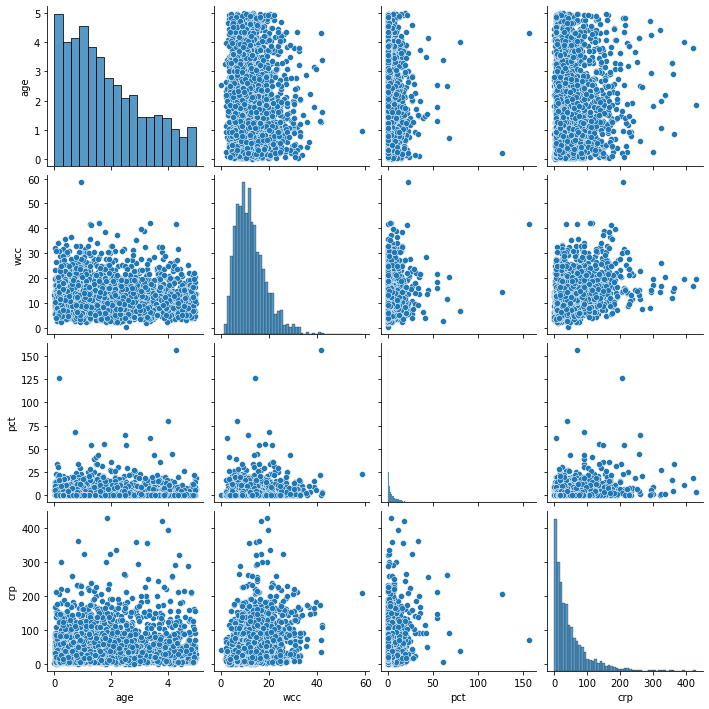

In [14]:
sb.pairplot(df)

## Encoding the categorical columns to convert it into numerics

In [15]:
prevAB = df['prevAB'].tolist()
prevAB=set(prevAB)
prevAB_set={}
temp=1
for i in prevAB:
    prevAB_set[i]=temp
    temp+=1
df.prevAB = [prevAB_set[item] for item in df.prevAB]
df

age   wcc  prevAB        pct         crp            sbi
0     0.79   3.8       2   0.090000   17.700000            UTI
1     1.91  25.3       1   4.400000  150.400000            UTI
2     0.07  20.0       2   0.548136   47.359279            UTI
3     0.95   6.0       2   0.310000    4.900000            UTI
4     0.11  15.6       2   0.936872   31.394860            UTI
...    ...   ...     ...        ...         ...            ...
2343  1.06  14.1       2   0.160000   16.700000  NotApplicable
2344  3.05  14.6       2   1.080000   77.500000  NotApplicable
2345  1.81   6.0       2   0.480000   75.300000  NotApplicable
2346  1.24  16.3       1  20.280000   17.300000  NotApplicable
2347  3.56  13.0       2   0.606293   18.181134  NotApplicable

[2348 rows x 6 columns]

In [16]:
sbi = df['sbi'].tolist()
sbi=set(sbi)
sbi_set={}
temp=1
for i in sbi:
    sbi_set[i]=temp
    temp+=1
df.sbi = [sbi_set[item] for item in df.sbi]
df

age   wcc  prevAB        pct         crp  sbi
0     0.79   3.8       2   0.090000   17.700000    1
1     1.91  25.3       1   4.400000  150.400000    1
2     0.07  20.0       2   0.548136   47.359279    1
3     0.95   6.0       2   0.310000    4.900000    1
4     0.11  15.6       2   0.936872   31.394860    1
...    ...   ...     ...        ...         ...  ...
2343  1.06  14.1       2   0.160000   16.700000    3
2344  3.05  14.6       2   1.080000   77.500000    3
2345  1.81   6.0       2   0.480000   75.300000    3
2346  1.24  16.3       1  20.280000   17.300000    3
2347  3.56  13.0       2   0.606293   18.181134    3

[2348 rows x 6 columns]

## Splitting the dependent and independent variables

In [17]:
x=df.iloc[:,:5].values
x

array([[7.90000021e-01, 3.80000000e+00, 2.00000000e+00, 9.00000000e-02,
        1.77000000e+01],
       [1.90999997e+00, 2.53000000e+01, 1.00000000e+00, 4.40000000e+00,
        1.50400000e+02],
       [7.00000000e-02, 2.00000000e+01, 2.00000000e+00, 5.48135972e-01,
        4.73592787e+01],
       ...,
       [1.80999994e+00, 6.00000000e+00, 2.00000000e+00, 4.80000000e-01,
        7.53000000e+01],
       [1.24000001e+00, 1.63000000e+01, 1.00000000e+00, 2.02800000e+01,
        1.73000000e+01],
       [3.55999994e+00, 1.30000000e+01, 2.00000000e+00, 6.06292932e-01,
        1.81811341e+01]])

In [18]:
y=df.iloc[:,-1].values
y

array([1, 1, 1, ..., 3, 3, 3], dtype=int64)

## Building the decision tree model (using entropy)

In [19]:
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(x, y)
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width=750, height=10)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.779573 to fit



## The graph is big because it has infinite depth in the tree

In [20]:
predict = tree.predict(x)
predict

array([1, 1, 1, ..., 3, 3, 3], dtype=int64)

In [21]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(y, predict))

Accuracy: 1.0


## We can clearly see that there is an overfitting in the trained model as the accuracy is 100%

## Seeing some performance metrics

In [22]:
from sklearn.metrics import confusion_matrix

### Confusion matrix

In [23]:
cm=confusion_matrix(y,predict) # True +ve, False -ve, False +ve, True -ve
cm

array([[ 311,    0,    0,    0],
       [   0,   34,    0,    0],
       [   0,    0, 1752,    0],
       [   0,    0,    0,  251]], dtype=int64)

### Visualizing in a plot

In [24]:
import matplotlib.pyplot as plt
import seaborn as sb

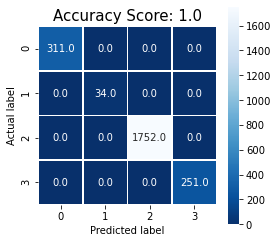

In [25]:
plt.figure(figsize=(4,4))
sb.heatmap(metrics.confusion_matrix(y,predict), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y, predict))
plt.title(all_sample_title, size = 15);

### Precision score

In [26]:
from sklearn.metrics import precision_score
precision_score(y, predict, average=None)

array([1., 1., 1., 1.])

## Reduce the depth of the tree and infer the observations

### Consider maximum depth of the tree=4

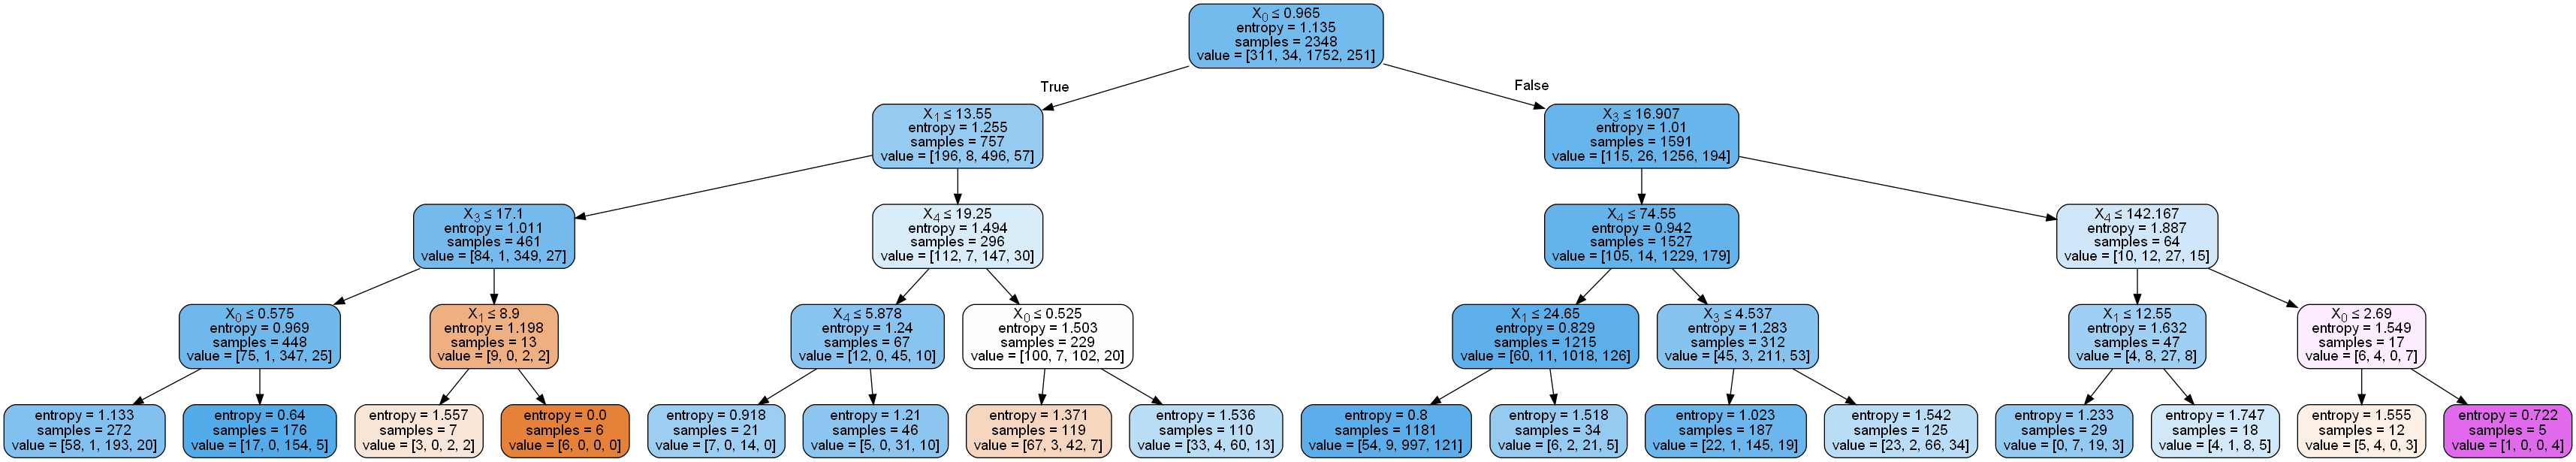

In [27]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth=4)
tree.fit(x, y)
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width=750, height=10)

In [28]:
predict = tree.predict(x)
predict

array([3, 3, 1, ..., 3, 3, 3], dtype=int64)

In [29]:
from sklearn.metrics import precision_score
precision_score(y, predict, average=None)

C:\Users\Raghav\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.5625    , 0.        , 0.77671669, 0.8       ])

In [30]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(y, predict))

Accuracy: 0.7636286201022147


## The main inference is that we can see that the overfitting has reduced and the accuracy of the prediction is now 76.36% 

## How does the model classify a child with 1 year of age, WCC=29, PCT=5, CRP=200 and no prevAB?

In [31]:
x_test=np.array([[1,29,1,5,200]])
x_test

array([[  1,  29,   1,   5, 200]])

In [32]:
predict_test=tree.predict(x_test)
predict_test

array([3], dtype=int64)

In [33]:
df["sbi"].unique()

array([1, 4, 2, 3], dtype=int64)

## We can see that the prediction is 3, which means that there is Not Applicable(no infection) predicted by the model, as 3 belongs to Not Applicable after we did the encoding

## The probability of the outcome for each input are in the form of a list below:

In [34]:
class_probabilitiesDec = tree.predict_proba(x) 
class_probabilitiesDec

array([[0.09659091, 0.        , 0.875     , 0.02840909],
       [0.11764706, 0.00534759, 0.77540107, 0.10160428],
       [0.56302521, 0.02521008, 0.35294118, 0.05882353],
       ...,
       [0.11764706, 0.00534759, 0.77540107, 0.10160428],
       [0.22222222, 0.05555556, 0.44444444, 0.27777778],
       [0.04572396, 0.00762066, 0.84419983, 0.10245555]])

## Inference: Thus, we have implemented the decision tree algorithm on the children.csv dataset, performed the statistical analysis, built a decision tree model with infinite and limited depth, predicted the output about the infection class, and analyzed the performance metrics 